# Description
Binary Classification Project Using Supervised Learning Required Libraries.
This project implements various machine learning algorithms to tackle a binary classification problem.
We import essential libraries for data manipulation, visualization, and implementing multiple classification models.
Additionally, we include metrics packages to evaluate model performance through various statistics like accuracy, precision, recall, F1-score, and ROC-AUC.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from sklearn import neighbors
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import confusion_matrix


# Data Loading and Exploratory Data Analysis

In this section, we load the dataset from Google Drive and perform initial exploratory data analysis.
The dataset contains features for binary classification with labels 0 and 1.First, we separate the data points based on their class labels for visualization purposes. Then, we create histograms to visualize the distribution of each feature across both classes. This visualization helps us understand the separability of classes based on individual features and identify potential patterns or overlaps in the feature distributions.
The histograms are colored differently for each class (red for class 1, blue for class 0) to easily distinguish between them. This initial visualization provides insights into which features might be more discriminative for our classification task.

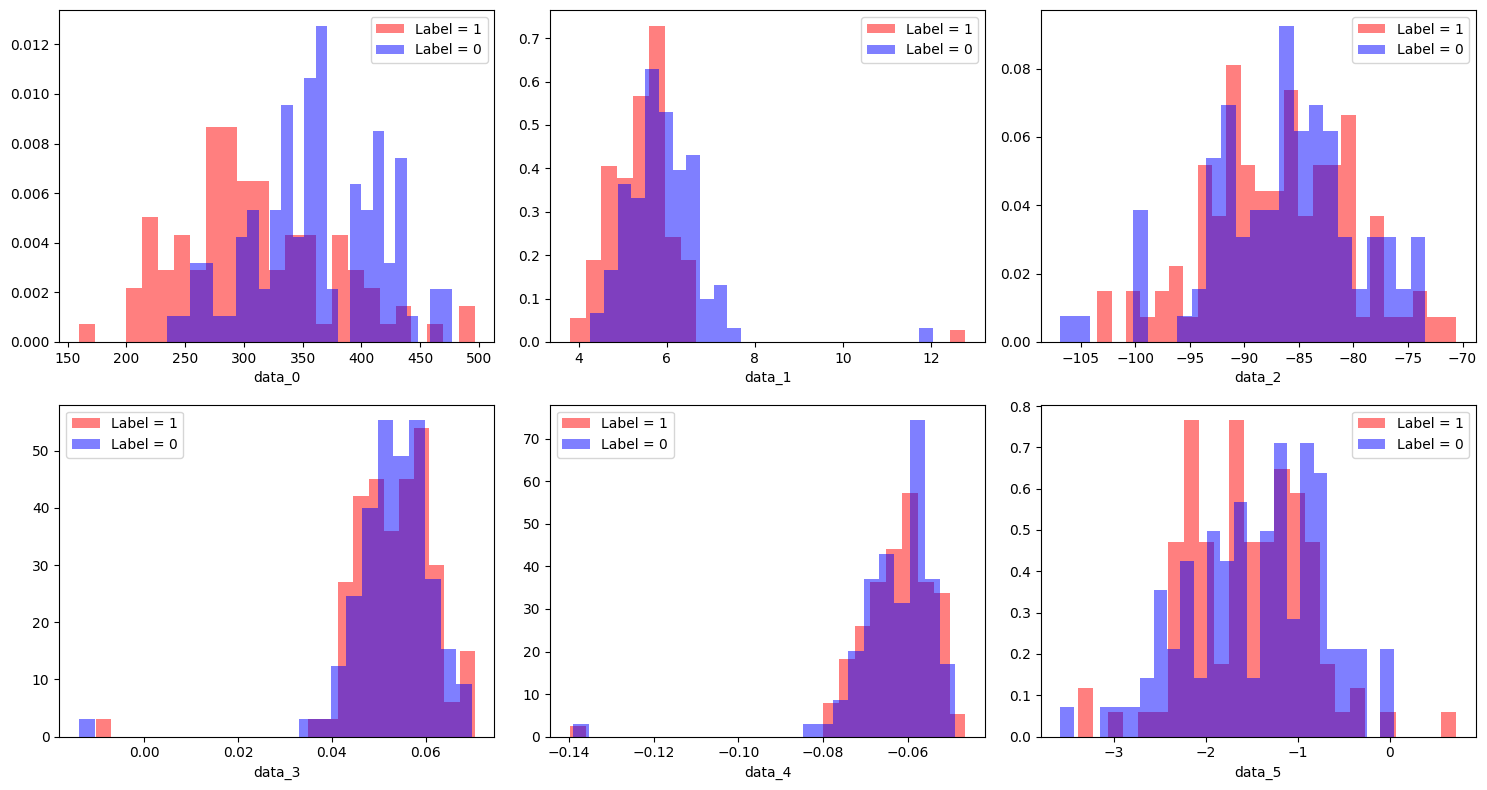

In [ ]:
# Importing the dataset from Google Drive
url = 'https://drive.google.com/file/d/1F0zf7WRLIBLKYmP73Q9kWXMeK9Hqz8OO/view?usp=sharing'
file_id = url.split('/')[-2]
download_url = f'https://drive.google.com/uc?id={file_id}'
df = pd.read_csv(download_url)

# Separating data points by class label
df1 = df.loc[df['label']>0.5] # Rows with label=1
df0 = df.loc[df['label']<0.5] # Rows with label=0
colonne = list(df.columns)
features = colonne[:-1]
label = colonne[6:7]

# Visualizing the distribution of each feature by class
plt.figure(figsize=(15,8))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.hist(df1[features[i]], bins=25, color='red', density=True, label='Label = 1', alpha=0.5)
    plt.xlabel(features[i])
    plt.hist(df0[features[i]], bins=25, color='blue', density=True, label='Label = 0', alpha=0.5)
    plt.xlabel(features[i])
    plt.legend()
plt.tight_layout()
plt.savefig("raw_data_distribution.png")
print()

#Analysis of Feature Distributions:
The exploratory data visualization reveals the presence of outliers or anomalous patterns in three specific features: data_1, data_3, and data_4. These anomalies are visible in the histograms as extreme values or unusual distribution patterns that deviate significantly from the majority of the data points. These outliers may have several potential impacts on our classification models:
1. They could skew the model training, particularly for algorithms sensitive to outliers;
2. They might represent noise in the data collection proces;
3. Alternatively, they could be meaningful signal points that characterize rare but important cases;
In the next steps, we'll need to decide how to handle these anomalies -
whether to remove them, transform the features, or use robust algorithms that are less affected by outliers.


In [ ]:
# Identifying Outliers in data_1
for i in range(len(df['data_1'])):
  if df['data_1'][i] > 10:
    print("data_1 outliers----> ", i)

print()

# Identifying Outliers in data_3
for i in range(len(df['data_3'])):
  if df['data_3'][i] < 0:
    print("data_3 outliers----> ", i)

print()

# Identifying Outliers in data_4
for i in range(len(df['data_4'])):
  if df['data_4'][i] < -0.1:
    print("data_4 outliers----> ", i)

data_1 outliers---->  115
data_1 outliers---->  175

data_3 outliers---->  115
data_3 outliers---->  175

data_4 outliers---->  115
data_4 outliers---->  175


# Detection of Specific Outliers in Key Features
Based on our initial histogram analysis, we identified three features with potential anomalies. To systematically identify these outliers, we establish threshold values derived from the histogram distributions and perform a direct search through the dataset.
For data_1: Values greater than 10 are considered outliers, as the majority of the distribution appears to fall below this threshold.
For data_3: Negative values are flagged as outliers, as the feature appears to predominantly contain positive values based on the distribution.
For data_4: Values less than -0.1 are identified as outliers, as they fall outside the main distribution cluster observed in the histogram.

The code prints the indices of data points containing these outlier values, allowing us to examine them more closely or potentially remove them in the data preprocessing phase.
This targeted approach to outlier detection ensures we're addressing specific anomalies that could impact model performance rather than applying generic outlier detection methods.

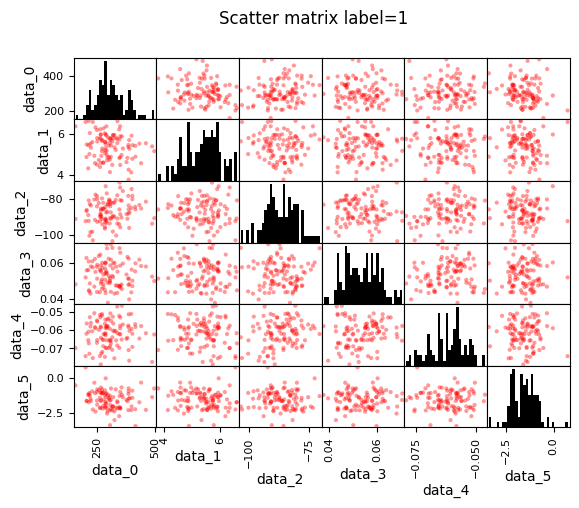

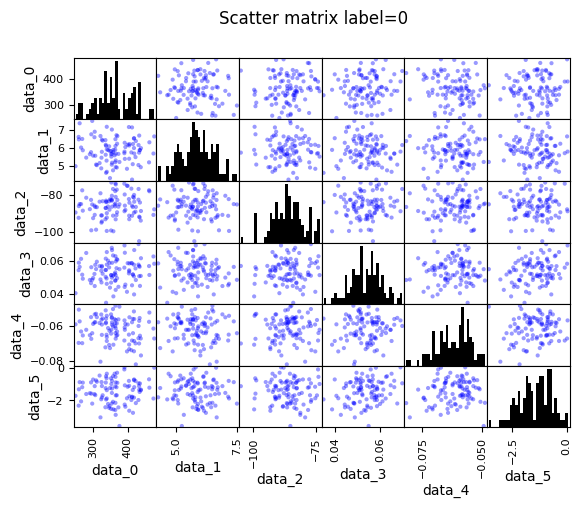

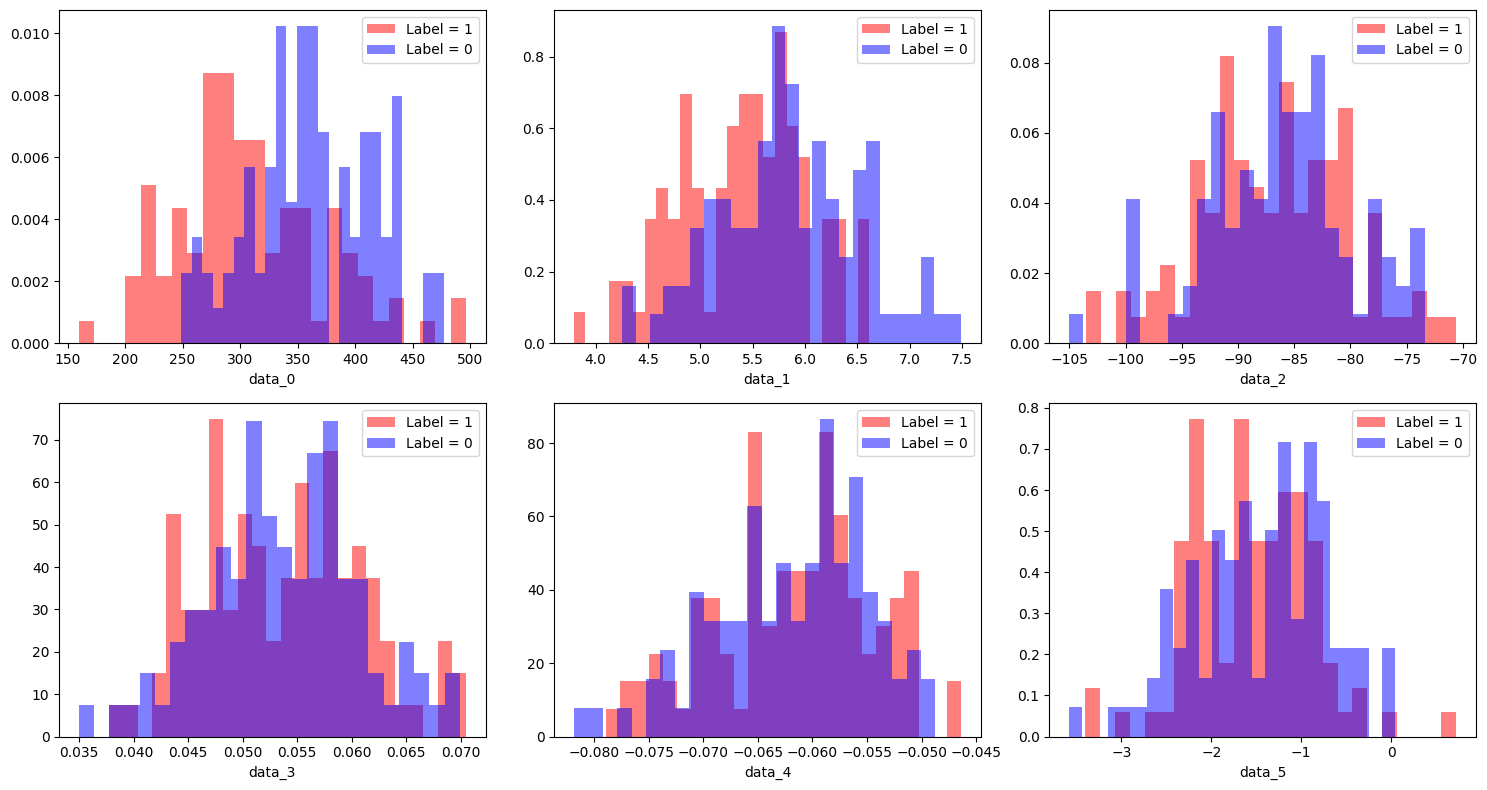

In [ ]:
# Removing anomalous values at positions 115 and 175

df = pd.read_csv(download_url)
df = df.drop([115, 175])  # Removal of anomalous data
df1 = df.loc[df['label']>0.5]  # Rows with label=1
df0 = df.loc[df['label']<0.5]  # Rows with label=0
colonne = list(df.columns)
features = colonne[:-1]
label = colonne[6:7]

# Creating scatter matrix for data points with label=1
_ = scatter_matrix(df1[features], color='red', alpha=0.4, hist_kwds={'bins':30, 'color':'black'})
plt.suptitle('Scatter matrix label=1')
plt.savefig("scatter1.png")
plt.show()

# Creating scatter matrix for data points with label=0
_ = scatter_matrix(df0[features], color='blue', alpha=0.4, hist_kwds={'bins':30, 'color':'black'})
plt.suptitle('Scatter matrix label=0')
plt.savefig("scatter0.png")
plt.show()

# Visualizing the distributions after outlier removal
plt.figure(figsize=(15,8))
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.hist(df1[features[i]], bins=25, color='red', density=True, label='Label = 1', alpha=0.5)
  plt.xlabel(features[i])
  plt.hist(df0[features[i]], bins=25, color='blue', density=True, label='Label = 0', alpha=0.5)
  plt.xlabel(features[i])
  plt.legend()
plt.tight_layout()
plt.savefig("cleaned_data.png")
print()

# Data Cleaning and Feature Relationship Analysis
Based on our outlier detection, we identified and removed two specific anomalous data points located at indices 115 and 175. Removing these outliers helps prevent them from unduly influencing our classification models particularly those sensitive to extreme values.
After cleaning the data, we conducted a more comprehensive visual analysis:
1. Scatter Matrix Visualization:
    We created scatter matrices for each class separately to examine:
    - The distributions of individual features (shown on the diagonal)
    - Pairwise relationships between features (shown in the off-diagonal    plots)
    - Potential clustering patterns within each class
2. Updated Histograms:
    We regenerated the histograms of each feature by class to observe the impact of outlier removal on the distributions. Key Observations:
 - Only the first two features (data_1 and data_2) show notable distributional differences between the two classes, suggesting they may be the most discriminative for classification
 - The remaining features show substantial overlap between classes, indicating they may provide less predictive power individually
 - No strong correlations are evident between features, suggesting that each feature may contribute unique information to the classification task
 - The absence of strong correlations also indicates that dimensionality reduction techniques might not yield significant benefits for this dataset


These observations will inform our feature selection and modeling strategies in subsequent steps.

In [ ]:
# Check for class balance between the two classes
print("Number of elements in class 0: ", len(df0[label]))
print("Number of elements in class 1: ", len(df1[label]))

Numero elementi della classe 0:  96
Numero elementi della classe 1:  102


# Class Balance Analysis
Before proceeding with model training, it's crucial to assess the balance between our target classes.
Class imbalance (when one class significantly outnumbers the other) can substantially impact the performance of classification algorithms and necessitate specific handling strategies.
We calculate the exact count of instances for each class label:
 - Class 0: 96 instances (representing the negative class)
 - Class 1: 102 instances (representing the positive class)


The results indicate a nearly balanced dataset with a slight majority in the positive class. This favorable balance (with a ratio of approximately 0.94:1) offers several advantages:
 1. Standard classification algorithms can be applied without specialized adjustments for class imbalance
 2. Accuracy becomes a more reliable metric for model evaluation
 3. No need for resampling techniques like SMOTE or random undersampling
 4. Default classification thresholds (0.5) are likely to be appropriate
 5. Model performance metrics will likely be similarly reliable for both classes

This balanced distribution allows us to focus on optimizing model performance without the additional complexity of addressing class imbalance issues. We can proceed with standard implementations of our chosen classification algorithms and evaluation techniques.

# Normalizzazione
Si normalizzano le features per avere media 0 e deviazione standard 1 in modo da pesarle allo stesso modo negli algoritmi di classificazionne.

In [ ]:
y = df[label].values # Converto il target in un vettore 1D affinché sia della forma corretta per il modello
y = y.ravel()
scaler = StandardScaler()
x_norm = scaler.fit_transform(df[features]) # Normalizzo il dataset


# GaussianNB Model Senza Riduzione Dimensionale
Si usa il dataset per trainare il modello GaussianNB, inoltre tramite un ciclo for, cambiando ogni volta lo shuffle del set di train e di test, si fa la media delle prestazioni dell'algoritmo.

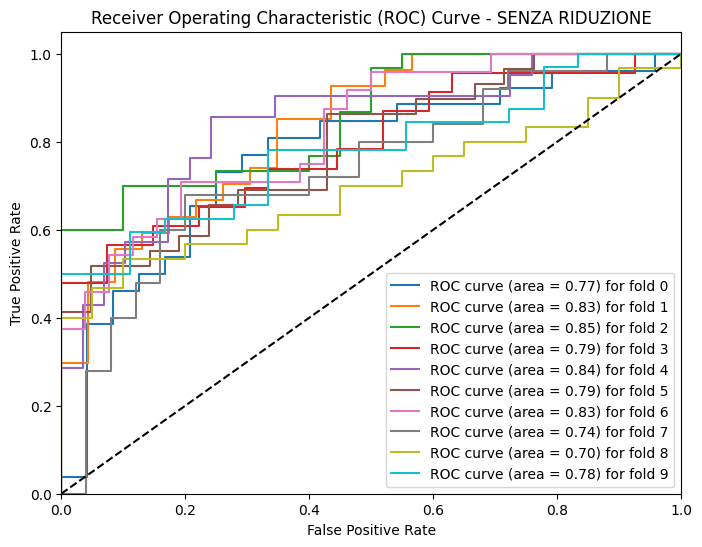


Accuracy train: 0.739 ± 0.022

Accuracy test: 0.696 ± 0.054

Area ROC: 0.792 ± 0.047



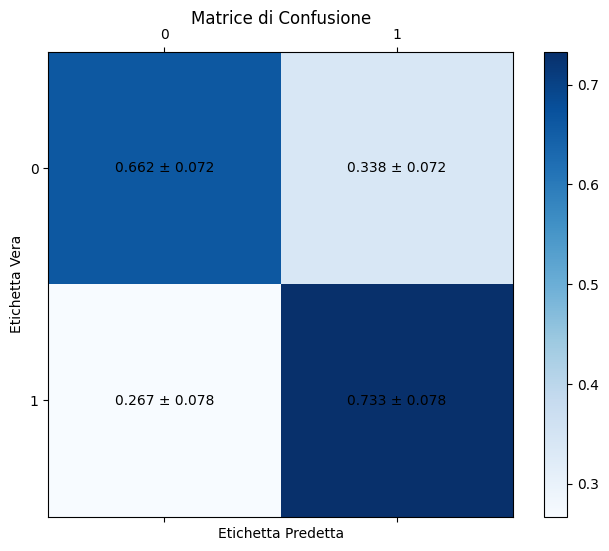

In [ ]:
N = 10 #Numero di iterazioni per calcolare media e deviazione standard dell'accuracy, della curva ROC e della matrice di confusione

score_train = [] #lista in cui si mettono le accuracy ottenute sul train di ogni iterazione
score = [] #lista in cui si mettono le accuracy ottenute sul test ad ogni iterazione
roc_auc = [] # Lista in cui si salva il valore dell'area della curva ROC per ciascuna iterazione
cm = [] # Lista in cui si salva la matrice di confusione relativa a ciascuna iterazione

plt.figure(figsize=(8, 6))
for k in range(N):
  X_train , X_test , Y_train , Y_test = train_test_split( x_norm, y, test_size = 0.25, random_state = k, shuffle = True ) # Si divide il dataset in train e test

  model = GaussianNB()
  model.fit( X_train, Y_train )

  score_train_temp = model.score( X_train, Y_train ) # Variabile in cui si salva temporaneamente il valore dell'accuracy ottenuta sul set di train per ciascuna iterazione
  score_temp = model.score( X_test, Y_test ) # Variabile in cui si salva temporaneamente il valore dell'accuracy ottenuta sul set di test per ciascuna iterazione

  score_train.append(score_train_temp) #Si salva ciascun valore nella lista
  score.append(score_temp) #Si salva ciascun valore dell'accuracy nella lista

  y_scores = model.predict_proba(X_test)[:, 1] # Si Calcolano le probabilità di appartenenza alle classi
  fpr, tpr, thresholds = roc_curve(Y_test, y_scores) # Si calcolano i FPR e i TPR
  area_roc = auc(fpr, tpr) # Calcolo dell'area sottostante la curva ROC

  plt.plot(fpr, tpr, label=f'ROC curve (area = {area_roc:.2f}) for fold {k}') # Plot delle curve ROC relative a ciascuna iterazione

  roc_auc.append(area_roc) #Salvo l'area roc della specifica iterazione nell'apposita lista
  Y_pred = model.predict(X_test) # Previsione delle etichette per il set di test
  cm_temp = confusion_matrix(Y_test, Y_pred, normalize = 'true') #Calcolo della matrice di confusione per ciascuna iterazione
  cm.append(cm_temp) # si salva ciascuna matrice di confusione all'interno dell'apposita lista


# Configurazione del grafico per le Curve ROC
plt.plot([0, 1], [0, 1], 'k--') # Linea diagonale per un classificatore casuale
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - SENZA RIDUZIONE')
plt.legend(loc="lower right")
plt.savefig("riduzione_none.png")
plt.show()

#Si  Converte ogni lista in un numpy array
score_train = np.array(score_train)
score = np.array(score)
roc_auc = np.array(roc_auc)
cm = np.array(cm)

#Calcolo della media e deviazione standard dell'accuracy

accuracy_train_NR = np.mean(score_train)
sigma_acc_train_NR = np.std(score_train)
accuracy_NR = np.mean(score)
sigma_acc_NR = np.std(score)

print()

print("Accuracy train: " + str(np.round(accuracy_train_NR, 3)) + " ± " + str(np.round(sigma_acc_train_NR, 3)))

print()

print("Accuracy test: " + str(np.round(accuracy_NR, 3)) + " ± " + str(np.round(sigma_acc_NR, 3)))

print()

# Calcolo della media e deviazione standard dell'area sottostante la curva ROC

roc_NR = np.mean(roc_auc)
std_roc_NR = np.std(roc_auc)

print("Area ROC: " + str(np.round(roc_NR, 3)) + " ± " + str(np.round(std_roc_NR, 3)))

print()

#Calcolo della media e deviazione standard della matrice di confusione
cm_NR_std = np.std(cm, axis=0)
cm_NR = np.mean(cm, axis=0)

# Tracciamento della matrice di confusione direttamente dalla matrice numpy
plt.figure(figsize=(8,6))
plt.matshow(cm_NR, cmap='Blues', fignum=1)
plt.title('Matrice di Confusione', pad=20)
plt.colorbar()
plt.xlabel('Etichetta Predetta')
plt.ylabel('Etichetta Vera')

# Aggiunta delle etichette ai valori
for i in range(cm_NR.shape[0]):
    for j in range(cm_NR.shape[1]):
        plt.text(j, i, str(np.round(cm_NR[i, j], 3)) + " ± " + str(np.round(cm_NR_std[i, j], 3)), va='center', ha='center')

plt.show()

# Riduzione Dimensionale Con Fisher


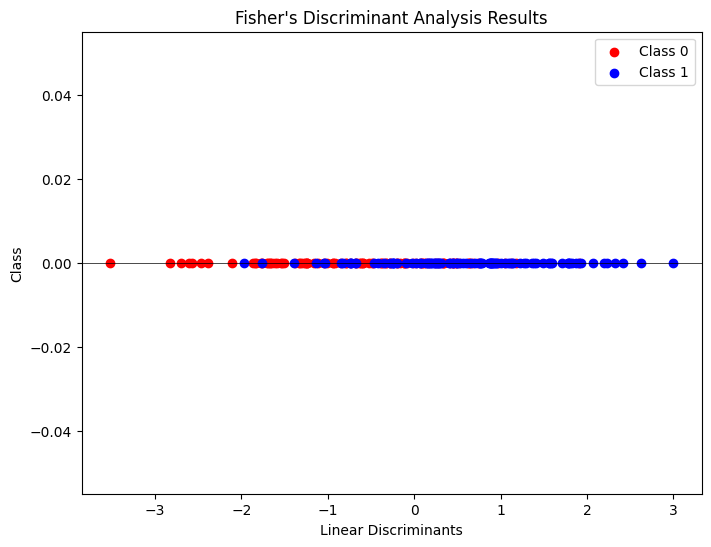

In [ ]:
# Vengono separate le features dai labels
X = x_norm  # Feature columns
y = df.iloc[:, 6].values    # Label column

# Create an LDA object
lda = LDA(n_components=1)

# Fit the LDA model
lda.fit(X, y)

# Transform the features to the new space
X_lda = lda.transform(X)

# Plot the LDA results
plt.figure(figsize=(8, 6))
plt.scatter(X_lda[y == 0], [0] * sum(y == 0), label='Class 0', c='red', marker='o')
plt.scatter(X_lda[y == 1], [0] * sum(y == 1), label='Class 1', c='blue', marker='o')

# Adding labels and title
plt.xlabel('Linear Discriminants')
plt.ylabel('Class')
plt.title('Fisher\'s Discriminant Analysis Results')
plt.axhline(0, color='black', linewidth=0.5)
plt.legend()
plt.show()

### GaussianNB con riduzione di Fisher

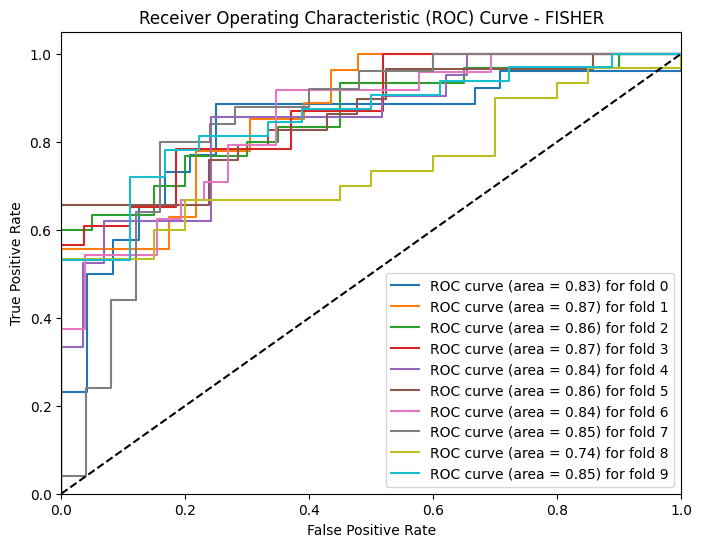


Accuracy train: 0.724 ± 0.019

Accuracy test: 0.752 ± 0.049

Area ROC: 0.842 ± 0.034



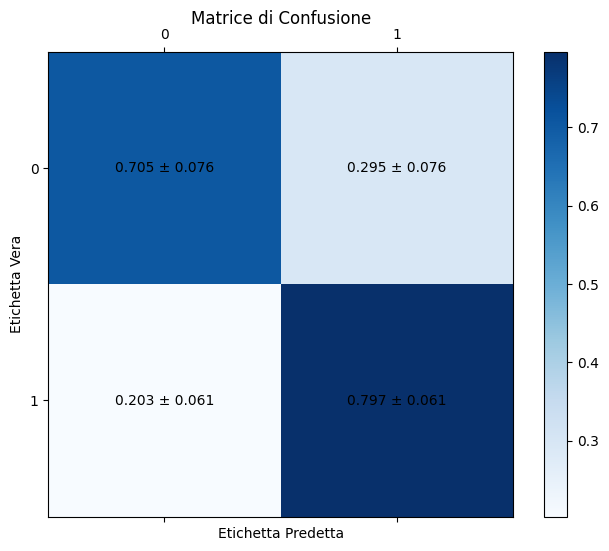

In [ ]:
N = 10 #Numero di iterazioni per calcolare media e deviazione standard dell'accuracy, della curva ROC e della matrice di confusione

score_train = [] #lista in cui si mettono le accuracy ottenute sul train di ogni iterazione
score = [] #lista in cui si mettono le accuracy ottenute sul test ad ogni iterazione
roc_auc = [] # Lista in cui si salva il valore dell'area della curva ROC per ciascuna iterazione
cm = [] # Lista in cui si salva la matrice di confusione relativa a ciascuna iterazione

plt.figure(figsize=(8, 6))
for k in range(N):
  X_train , X_test , Y_train , Y_test = train_test_split( X_lda, y, test_size = 0.25, random_state = k, shuffle = True ) # Si divide il dataset in train e test, si noti come le features sono quelle provenienti dalla riduzione di Fisher

  model = GaussianNB()
  model.fit( X_train, Y_train )

  score_train_temp = model.score( X_train, Y_train ) # Variabile in cui si salva temporaneamente il valore dell'accuracy ottenuta sul set di train per ciascuna iterazione
  score_temp = model.score( X_test, Y_test ) # Variabile in cui si salva temporaneamente il valore dell'accuracy ottenuta sul set di test per ciascuna iterazione

  score_train.append(score_train_temp) #Si salva ciascun valore nella lista
  score.append(score_temp) #Si salva ciascun valore dell'accuracy nella lista

  y_scores = model.predict_proba(X_test)[:, 1] # Si Calcolano le probabilità di appartenenza alle classi
  fpr, tpr, thresholds = roc_curve(Y_test, y_scores) # Si calcolano i FPR e i TPR
  area_roc = auc(fpr, tpr) # Calcolo dell'area sottostante la curva ROC

  plt.plot(fpr, tpr, label=f'ROC curve (area = {area_roc:.2f}) for fold {k}') # Plot delle curve ROC relative a ciascuna iterazione

  roc_auc.append(area_roc) #Salvo l'area roc della specifica iterazione nell'apposita lista
  Y_pred = model.predict(X_test) # Previsione delle etichette per il set di test
  cm_temp = confusion_matrix(Y_test, Y_pred, normalize = 'true') #Calcolo della matrice di confusione per ciascuna iterazione
  cm.append(cm_temp) # si salva ciascuna matrice di confusione all'interno dell'apposita lista


# Configurazione del grafico per le Curve ROC
plt.plot([0, 1], [0, 1], 'k--') # Linea diagonale per un classificatore casuale
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - FISHER')
plt.legend(loc="lower right")
plt.savefig("riduzione_fisher.png")
plt.show()

#Si  Converte ogni lista in un numpy array
score_train = np.array(score_train)
score = np.array(score)
roc_auc = np.array(roc_auc)
cm = np.array(cm)

#Calcolo della media e deviazione standard dell'accuracy

accuracy_train_fish = np.mean(score_train)
sigma_acc_train_fish = np.std(score_train)
accuracy_fish = np.mean(score)
sigma_acc_fish = np.std(score)

print()

print("Accuracy train: " + str(np.round(accuracy_train_fish, 3)) + " ± " + str(np.round(sigma_acc_train_fish, 3)))

print()

print("Accuracy test: " + str(np.round(accuracy_fish, 3)) + " ± " + str(np.round(sigma_acc_fish, 3)))

print()

# Calcolo della media e deviazione standard dell'area sottostante la curva ROC

roc_fish = np.mean(roc_auc)
std_roc_fish = np.std(roc_auc)

print("Area ROC: " + str(np.round(roc_fish, 3)) + " ± " + str(np.round(std_roc_fish, 3)))

print()

#Calcolo della media e deviazione standard della matrice di confusione
cm_fish_std = np.std(cm, axis=0)
cm_fish = np.mean(cm, axis=0)

# Tracciamento della matrice di confusione direttamente dalla matrice numpy
plt.figure(figsize=(8,6))
plt.matshow(cm_fish, cmap='Blues', fignum=1)
plt.title('Matrice di Confusione', pad=20)
plt.colorbar()
plt.xlabel('Etichetta Predetta')
plt.ylabel('Etichetta Vera')

# Aggiunta delle etichette ai valori
for i in range(cm_fish.shape[0]):
    for j in range(cm_fish.shape[1]):
        plt.text(j, i, str(np.round(cm_fish[i, j], 3)) + " ± " + str(np.round(cm_fish_std[i, j], 3)), va='center', ha='center')

plt.show()

# Riduzione dimensionale manuale
Si rimuovono 4 features tenendo solo data_0 e data_1, le uniche da cui si nota distinzione tra le due classi.


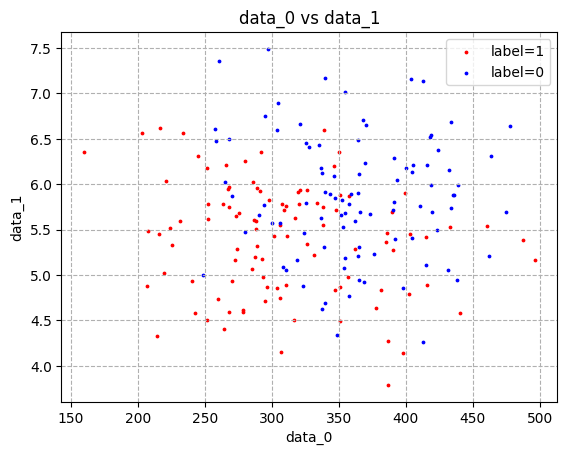

In [ ]:
df=pd.read_csv(download_url)

df = df.drop([115, 175]) #Waste data removal

#df = df.drop('data_0', axis=1)
#df = df.drop('data_1', axis=1)
df = df.drop('data_2', axis=1)
df = df.drop('data_3', axis=1)
df = df.drop('data_4', axis=1)
df = df.drop('data_5', axis=1)

df1 = df.loc[df['label']>0.5] #line with label=1
df0 = df.loc[df['label']<0.5] #line with label=0
colonne = list(df.columns)
features = colonne[:-1]
label = colonne [2:3]

plt.scatter(df1['data_0'],df1['data_1'],color='r',s=3,label='label=1')
plt.scatter(df0['data_0'],df0['data_1'],color='b',s=3,label='label=0')
plt.grid(linestyle='--', axis='both')
plt.legend()
plt.xlabel('data_0')
plt.ylabel('data_1')
plt.title('data_0 vs data_1')
plt.show()

Dal plot si osserva la divisione tra le due label sulle prime due feature

In [ ]:
y = df[label].values # Converto il target in un vettore 1D affinché sia della forma corretta per il modello
y = y.ravel()
scaler = StandardScaler()
x_norm = scaler.fit_transform(df[features]) # Si normalizza il dataset

## GaussianNB con riduzione dimensionale

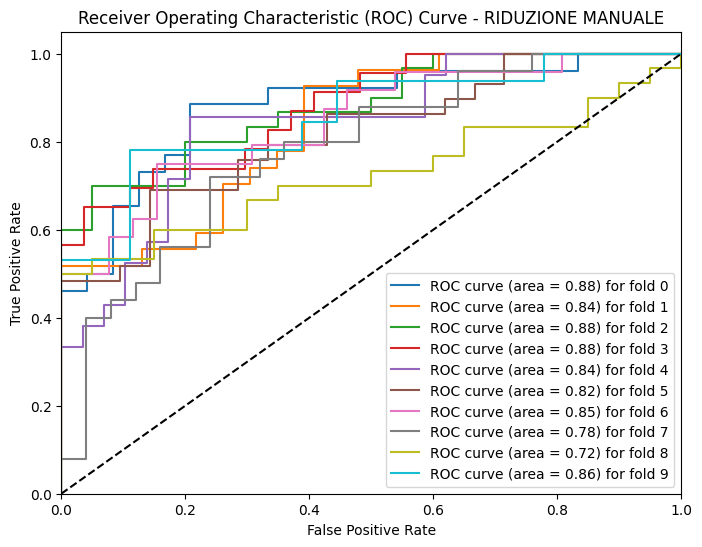


Accuracy train: 0.726 ± 0.014

Accuracy test: 0.748 ± 0.048

Area ROC: 0.834 ± 0.047



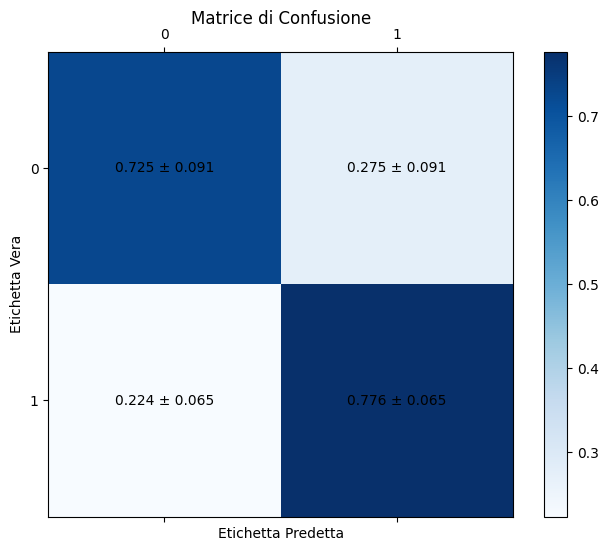

In [ ]:
N = 10 #Numero di iterazioni per calcolare media e deviazione standard dell'accuracy, della curva ROC e della matrice di confusione

score_train = [] #lista in cui si mettono le accuracy ottenute sul train di ogni iterazione
score = [] #lista in cui si mettono le accuracy ottenute sul test ad ogni iterazione
roc_auc = [] # Lista in cui si salva il valore dell'area della curva ROC per ciascuna iterazione
cm = [] # Lista in cui si salva la matrice di confusione relativa a ciascuna iterazione

plt.figure(figsize=(8, 6))
for k in range(N):
  X_train , X_test , Y_train , Y_test = train_test_split( x_norm, y, test_size = 0.25, random_state = k, shuffle = True ) # Si divide il dataset in train e test, si noti come le features sono quelle provenienti dalla riduzione di Fisher

  model = GaussianNB()
  model.fit( X_train, Y_train )

  score_train_temp = model.score( X_train, Y_train ) # Variabile in cui si salva temporaneamente il valore dell'accuracy ottenuta sul set di train per ciascuna iterazione
  score_temp = model.score( X_test, Y_test ) # Variabile in cui si salva temporaneamente il valore dell'accuracy ottenuta sul set di test per ciascuna iterazione

  score_train.append(score_train_temp) #Si salva ciascun valore nella lista
  score.append(score_temp) #Si salva ciascun valore dell'accuracy nella lista

  y_scores = model.predict_proba(X_test)[:, 1] # Si Calcolano le probabilità di appartenenza alle classi
  fpr, tpr, thresholds = roc_curve(Y_test, y_scores) # Si calcolano i FPR e i TPR
  area_roc = auc(fpr, tpr) # Calcolo dell'area sottostante la curva ROC

  plt.plot(fpr, tpr, label=f'ROC curve (area = {area_roc:.2f}) for fold {k}') # Plot delle curve ROC relative a ciascuna iterazione

  roc_auc.append(area_roc) #Salvo l'area roc della specifica iterazione nell'apposita lista
  Y_pred = model.predict(X_test) # Previsione delle etichette per il set di test
  cm_temp = confusion_matrix(Y_test, Y_pred, normalize = 'true') #Calcolo della matrice di confusione per ciascuna iterazione
  cm.append(cm_temp) # si salva ciascuna matrice di confusione all'interno dell'apposita lista


# Configurazione del grafico per le Curve ROC
plt.plot([0, 1], [0, 1], 'k--') # Linea diagonale per un classificatore casuale
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - RIDUZIONE MANUALE')
plt.legend(loc="lower right")
plt.savefig("riduzione_manuale.png")
plt.show()

#Si  Converte ogni lista in un numpy array
score_train = np.array(score_train)
score = np.array(score)
roc_auc = np.array(roc_auc)
cm = np.array(cm)

#Calcolo della media e deviazione standard dell'accuracy

accuracy_train_R = np.mean(score_train)
sigma_acc_train_R = np.std(score_train)
accuracy_R = np.mean(score)
sigma_acc_R = np.std(score)

print()

print("Accuracy train: " + str(np.round(accuracy_train_R, 3)) + " ± " + str(np.round(sigma_acc_train_R, 3)))

print()

print("Accuracy test: " + str(np.round(accuracy_R, 3)) + " ± " + str(np.round(sigma_acc_R, 3)))

print()

# Calcolo della media e deviazione standard dell'area sottostante la curva ROC

roc_R = np.mean(roc_auc)
std_roc_R = np.std(roc_auc)

print("Area ROC: " + str(np.round(roc_R, 3)) + " ± " + str(np.round(std_roc_R, 3)))

print()

#Calcolo della media e deviazione standard della matrice di confusione
cm_R_std = np.std(cm, axis=0)
cm_R = np.mean(cm, axis=0)

# Tracciamento della matrice di confusione direttamente dalla matrice numpy
plt.figure(figsize=(8,6))
plt.matshow(cm_R, cmap='Blues', fignum=1)
plt.title('Matrice di Confusione', pad=20)
plt.colorbar()
plt.xlabel('Etichetta Predetta')
plt.ylabel('Etichetta Vera')

# Aggiunta delle etichette ai valori
for i in range(cm_R.shape[0]):
    for j in range(cm_R.shape[1]):
        plt.text(j, i, str(np.round(cm_R[i, j], 3)) + " ± " + str(np.round(cm_R_std[i, j], 3)), va='center', ha='center')

plt.show()

# Confronto GaussianNB
Si confrontano i risultati del modello GaussianNB sui dataset ridotti dimensionalmente e non.

In [ ]:
# Si studia la compatibilità tra le tre varianti del modello GaussianNB rispetto all'area della curva ROC e all'accuracy
roc_NR_fish = (roc_NR - roc_fish) / np.sqrt((std_roc_NR ** 2) + (std_roc_fish ** 2))
acc_NR_fish = (accuracy_NR - accuracy_fish) / np.sqrt((sigma_acc_NR **2) + (sigma_acc_fish **2))
print("Compatibilità Area ROC (NR-Fisher): ", roc_NR_fish)
print("Compatibilità Accuracy (NR-Fisher): ", acc_NR_fish)

print()

roc_NR_R = (roc_NR - roc_R) / np.sqrt((std_roc_NR ** 2) + (std_roc_R ** 2))
acc_NR_R = (accuracy_NR - accuracy_R) / np.sqrt((sigma_acc_NR **2) + (sigma_acc_R **2))
print("Compatibilità Area ROC (NR-R): ", roc_NR_R)
print("Compatibilità Accuracy (NR-R): ", acc_NR_R)

print()

roc_R_fish = (roc_R - roc_fish) / np.sqrt((std_roc_R ** 2) + (std_roc_fish ** 2))
acc_R_fish = (accuracy_R - accuracy_fish) / np.sqrt((sigma_acc_R **2) + (sigma_acc_fish **2))
print("Compatibilità Area ROC (R-Fisher): ", roc_R_fish)
print("Compatibilità Accuracy (R-Fisher): ", acc_R_fish)

Compatibilità Area ROC (NR-Fisher):  -0.8584259809614135
Compatibilità Accuracy (NR-Fisher):  -0.770674635588453

Compatibilità Area ROC (NR-R):  -0.6409861472608527
Compatibilità Accuracy (NR-R):  -0.7211102550927986

Compatibilità Area ROC (R-Fisher):  -0.1277239653620562
Compatibilità Accuracy (R-Fisher):  -0.058025885318565985


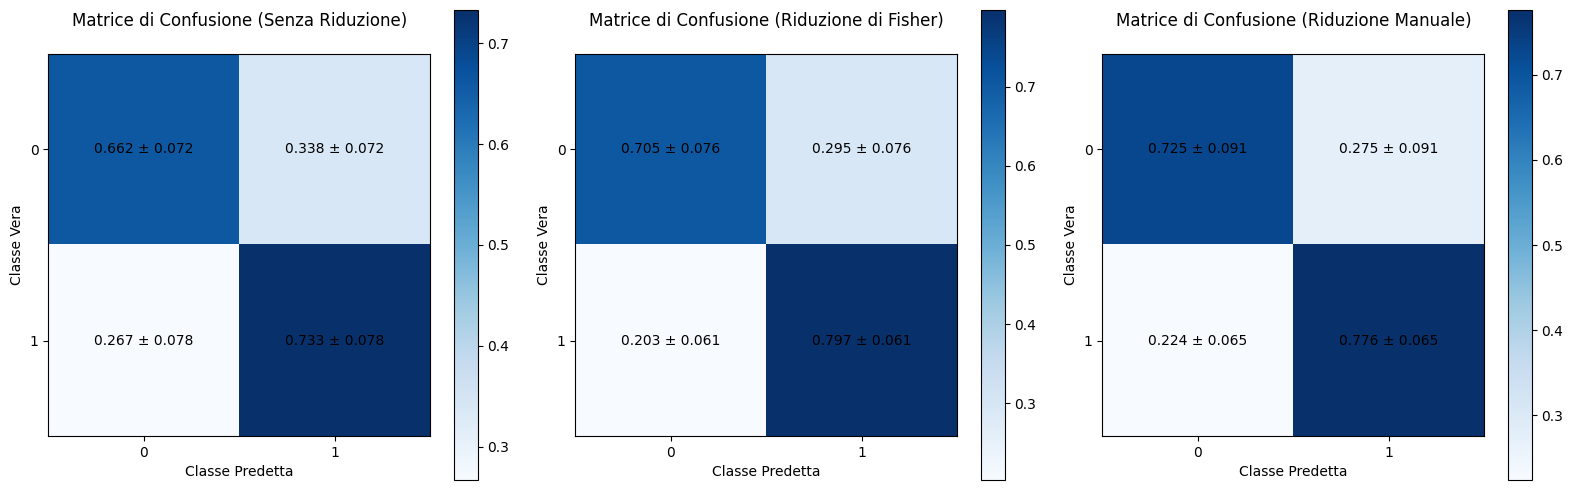

In [ ]:
plt.figure(figsize=(16, 5))

# Definisci le etichette per gli assi x e y
class_labels = [str(i) for i in range(cm_NR.shape[0])]

# Prima matrice di confusione
plt.subplot(1, 3, 1)
plt.imshow(cm_NR, interpolation='nearest', cmap='Blues')
plt.title('Matrice di Confusione (Senza Riduzione)', pad=20)
plt.colorbar()
plt.xlabel('Classe Predetta')
plt.ylabel('Classe Vera')
plt.xticks(range(len(class_labels)), class_labels)
plt.yticks(range(len(class_labels)), class_labels)
for i in range(cm_NR.shape[0]):
    for j in range(cm_NR.shape[1]):
        plt.text(j, i, str(round(cm_NR[i, j],3)) + " ± " + str(np.round(cm_NR_std[i, j], 3)), va='center', ha='center')

# Seconda matrice di confusione
plt.subplot(1, 3, 2)
plt.imshow(cm_fish, interpolation='nearest', cmap='Blues')
plt.title('Matrice di Confusione (Riduzione di Fisher)', pad=20)
plt.colorbar()
plt.xlabel('Classe Predetta')
plt.ylabel('Classe Vera')
plt.xticks(range(len(class_labels)), class_labels)
plt.yticks(range(len(class_labels)), class_labels)
for i in range(cm_fish.shape[0]):
    for j in range(cm_fish.shape[1]):
        plt.text(j, i, str(round(cm_fish[i, j],3)) + " ± " + str(np.round(cm_fish_std[i, j], 3)), va='center', ha='center')

# Terza matrice di confusione
plt.subplot(1, 3, 3)
plt.imshow(cm_R, interpolation='nearest', cmap='Blues')
plt.title('Matrice di Confusione (Riduzione Manuale)', pad=20)
plt.colorbar()
plt.xlabel('Classe Predetta')
plt.ylabel('Classe Vera')
plt.xticks(range(len(class_labels)), class_labels)
plt.yticks(range(len(class_labels)), class_labels)
for i in range(cm_R.shape[0]):
    for j in range(cm_R.shape[1]):
        plt.text(j, i, str(round(cm_R[i, j],3)) + " ± " + str(np.round(cm_R_std[i, j], 3)), va='center', ha='center')

plt.tight_layout()
plt.savefig("Gaussian_matrix.png")
plt.show()


## k-NN

Si è poi implementato il modello k-NN, ottimizzando il parametro n_neighbors tramite k-fold cross validation. Il modello è stato applicato al dataset ridotto con il metodo di Fisher

k-NN:
k:  accuracy: 
 1: 0.61   +-  0.06
 5: 0.72   +-  0.03
 9: 0.69   +-  0.03
14: 0.71   +-  0.05
18: 0.73   +-  0.05
22: 0.74   +-  0.06
27: 0.73   +-  0.08
31: 0.73   +-  0.08
35: 0.73   +-  0.08
40: 0.73   +-  0.06

Max test accuracy = 0.741 con k =  22 



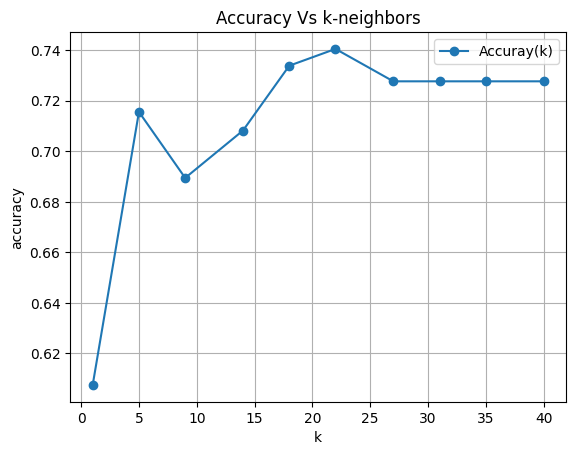

In [ ]:
X_train , X_test , Y_train , Y_test = train_test_split( X_lda, y, test_size = 0.2, random_state=1, shuffle = True )

print('k-NN:')
print('k:  accuracy: ')
acc = []
kval = []
accSigma = []
for k in np.linspace(1,40,10, dtype=int):
  kNN = neighbors.KNeighborsClassifier(k)

  kNN_accuracies = cross_val_score(kNN, X_train, Y_train, cv=6)
  #divido il training set in 6 parti e ne utilizzo una alla volta come validation e le altre come train
  kNN_accuracy= np.mean(kNN_accuracies)
  kNN_accuracySigma=np.std(kNN_accuracies)

  acc.append(kNN_accuracy)
  accSigma.append(kNN_accuracySigma)
  kval.append(k)
  print(f'{k:2d}: {kNN_accuracy:4.2f}   +-  {kNN_accuracySigma:4.2f}')
print('')
print('Max test accuracy =', round(max(acc),3) , 'con k = ', kval[acc.index(max(acc))],'\n')


plt.title("Accuracy Vs k-neighbors")
plt.plot( kval, acc, marker = 'o', label = "Accuray(k)")
plt.xlabel('k')
plt.ylabel('accuracy')
plt.grid()
plt.legend()
plt.savefig("variazione_k.png")
plt.show()


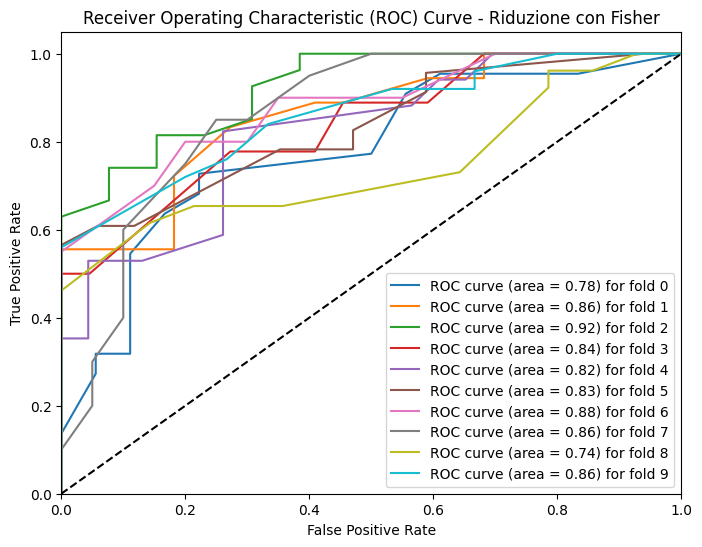


Accuracy train: 0.735 ± 0.011

Accuracy test: 0.742 ± 0.045

Area ROC: 0.839 ± 0.048



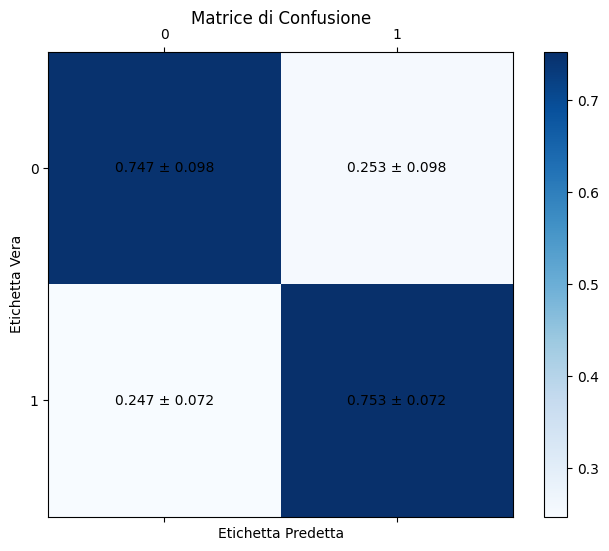

In [ ]:
N = 10 #Numero di iterazioni per calcolare media e deviazione standard dell'accuracy, della curva ROC e della matrice di confusione

score_train = [] #lista in cui si mettono le accuracy ottenute sul train di ogni iterazione
score = [] #lista in cui si mettono le accuracy ottenute sul test ad ogni iterazione
roc_auc = [] # Lista in cui si salva il valore dell'area della curva ROC per ciascuna iterazione
cm = [] # Lista in cui si salva la matrice di confusione relativa a ciascuna iterazione

plt.figure(figsize=(8, 6))
for k in range(N):
  X_train , X_test , Y_train , Y_test = train_test_split( X_lda, y, test_size = 0.20, random_state = k, shuffle = True ) # Si divide il dataset in train e test, si noti come le features sono quelle provenienti dalla riduzione di Fisher

  kNN= neighbors.KNeighborsClassifier(kval[acc.index(max(acc))])
  kNN.fit(X_train, Y_train)

  score_train_temp = kNN.score( X_train, Y_train ) # Variabile in cui si salva temporaneamente il valore dell'accuracy ottenuta sul set di train per ciascuna iterazione
  score_temp = kNN.score( X_test, Y_test ) # Variabile in cui si salva temporaneamente il valore dell'accuracy ottenuta sul set di test per ciascuna iterazione

  score_train.append(score_train_temp) #Si salva ciascun valore nella lista
  score.append(score_temp) #Si salva ciascun valore dell'accuracy nella lista

  y_scores = kNN.predict_proba(X_test)[:, 1] # Si Calcolano le probabilità di appartenenza alle classi
  fpr, tpr, thresholds = roc_curve(Y_test, y_scores) # Si calcolano i FPR e i TPR
  area_roc = auc(fpr, tpr) # Calcolo dell'area sottostante la curva ROC

  plt.plot(fpr, tpr, label=f'ROC curve (area = {area_roc:.2f}) for fold {k}') # Plot delle curve ROC relative a ciascuna iterazione

  roc_auc.append(area_roc) #Salvo l'area roc della specifica iterazione nell'apposita lista
  Y_pred = kNN.predict(X_test) # Previsione delle etichette per il set di test
  cm_temp = confusion_matrix(Y_test, Y_pred, normalize = 'true') #Calcolo della matrice di confusione per ciascuna iterazione
  cm.append(cm_temp) # si salva ciascuna matrice di confusione all'interno dell'apposita lista



# Configurazione del grafico per le Curve ROC
plt.plot([0, 1], [0, 1], 'k--') # Linea diagonale per un classificatore casuale
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Riduzione con Fisher')
plt.legend(loc="lower right")
plt.savefig("knn_roc.png")
plt.show()

#Si  Converte ogni lista in un numpy array
score_train = np.array(score_train)
score = np.array(score)
roc_auc = np.array(roc_auc)
cm = np.array(cm)

#Calcolo della media e deviazione standard dell'accuracy

accuracy_train_kNN = np.mean(score_train)
sigma_acc_train_kNN = np.std(score_train)
accuracy_kNN = np.mean(score)
sigma_acc_kNN = np.std(score)

print()

print("Accuracy train: " + str(np.round(accuracy_train_kNN, 3)) + " ± " + str(np.round(sigma_acc_train_kNN, 3)))

print()

print("Accuracy test: " + str(np.round(accuracy_kNN, 3)) + " ± " + str(np.round(sigma_acc_kNN, 3)))

print()

# Calcolo della media e deviazione standard dell'area sottostante la curva ROC

roc_kNN = np.mean(roc_auc)
std_roc_kNN = np.std(roc_auc)

print("Area ROC: " + str(np.round(roc_kNN, 3)) + " ± " + str(np.round(std_roc_kNN, 3)))

print()

#Calcolo della media e deviazione standard della matrice di confusione
cm_kNN_std = np.std(cm, axis=0)
cm_kNN = np.mean(cm, axis=0)

# Tracciamento della matrice di confusione direttamente dalla matrice numpy
plt.figure(figsize=(8,6))
plt.matshow(cm_kNN, cmap='Blues', fignum=1)
plt.title('Matrice di Confusione', pad=20)
plt.colorbar()
plt.xlabel('Etichetta Predetta')
plt.ylabel('Etichetta Vera')

# Aggiunta delle etichette ai valori
for i in range(cm_kNN.shape[0]):
    for j in range(cm_kNN.shape[1]):
        plt.text(j, i, str(np.round(cm_kNN[i, j], 3)) + " ± " + str(np.round(cm_kNN_std[i, j], 3)), va='center', ha='center')
plt.savefig("knn_matrix.png")
plt.show()


#  Confronto tra kNN e GaussianNB

In [ ]:
roc_R_kNN = (roc_R - roc_kNN) / np.sqrt((std_roc_R ** 2) + (std_roc_kNN ** 2))
acc_R_kNN = (accuracy_R - accuracy_kNN) / np.sqrt((sigma_acc_R **2) + (sigma_acc_kNN **2))
print("Compatibilità Area ROC (R-kNN): ", roc_R_kNN)
print("Compatibilità Accuracy (R-kNN): ", acc_R_kNN)

print()

roc_fish_kNN = (roc_fish - roc_kNN) / np.sqrt((std_roc_fish ** 2) + (std_roc_kNN ** 2))
acc_fish_kNN = (accuracy_fish - accuracy_kNN) / np.sqrt((sigma_acc_fish **2) + (sigma_acc_kNN **2))
print("Compatibilità Area ROC (Fisher-kNN): ", roc_fish_kNN)
print("Compatibilità Accuracy (Fisher-kNN): ", acc_fish_kNN)



Compatibilità Area ROC (R-kNN):  -0.07531568285001942
Compatibilità Accuracy (R-kNN):  0.08346516909576591

Compatibilità Area ROC (Fisher-kNN):  0.04052746782709607
Compatibilità Accuracy (Fisher-kNN):  0.14285714285714207
